In [1]:
## read libraries
import numpy as np
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
# read the paraquet file check the file type and data
df = pd.read_parquet('data.parquet')
print(df)

            x_0        x_1       x_2       x_3       x_4        x_5  \
0.0   -2.509198  -6.589518  6.574750  1.225544 -5.441297  -5.158895   
0.1   -1.808076  -5.784906  7.091301  1.977199 -4.726164  -4.434952   
0.2   -1.107714  -4.981646  7.607356  2.728112 -4.012037  -3.711820   
0.3   -0.408874  -4.181087  8.122422  3.477542 -3.299921  -2.990308   
0.4    0.287688  -3.384572  8.636006  4.224751 -2.590815  -2.271221   
...         ...        ...       ...       ...       ...        ...   
999.5 -9.945182 -18.004796  1.004384  2.775047 -8.882149 -16.591064   
999.6 -9.806384 -18.263131  0.952351  2.873734 -8.959679 -16.246443   
999.7 -9.661605 -18.501171  0.901751  2.958782 -9.021376 -15.893401   
999.8 -9.511100 -18.718362       NaN  3.030186 -9.067106 -15.532386   
999.9 -9.355133 -18.914192  0.804813  3.087963 -9.096769 -15.163854   

             x_6       x_7        x_8       x_9             y  
0.0     6.344444  4.929828   9.272400  5.915853     -7.994212  
0.1     6.909614  5

In [3]:
# check null values
df.isnull().sum()

x_0    500
x_1    500
x_2    500
x_3    500
x_4    500
x_5    500
x_6    500
x_7    500
x_8    500
x_9    500
y        0
dtype: int64

In [4]:
# From the above it is observed that NaN values 500 but if drop them, lose of 40
# percent of data so data is replaced using mean values of above and below cell
# at each NaN values.###
df = df.fillna((df.shift()+df.shift(-1))/2)

In [5]:
print(df)

            x_0        x_1       x_2       x_3       x_4        x_5  \
0.0   -2.509198  -6.589518  6.574750  1.225544 -5.441297  -5.158895   
0.1   -1.808076  -5.784906  7.091301  1.977199 -4.726164  -4.434952   
0.2   -1.107714  -4.981646  7.607356  2.728112 -4.012037  -3.711820   
0.3   -0.408874  -4.181087  8.122422  3.477542 -3.299921  -2.990308   
0.4    0.287688  -3.384572  8.636006  4.224751 -2.590815  -2.271221   
...         ...        ...       ...       ...       ...        ...   
999.5 -9.945182 -18.004796  1.004384  2.775047 -8.882149 -16.591064   
999.6 -9.806384 -18.263131  0.952351  2.873734 -8.959679 -16.246443   
999.7 -9.661605 -18.501171  0.901751  2.958782 -9.021376 -15.893401   
999.8 -9.511100 -18.718362  0.853282  3.030186 -9.067106 -15.532386   
999.9 -9.355133 -18.914192  0.804813  3.087963 -9.096769 -15.163854   

             x_6       x_7        x_8       x_9             y  
0.0     6.344444  4.929828   9.272400  5.915853     -7.994212  
0.1     6.909614  5

In [6]:
#It still has NaN values so it is less than 1 percent so drop the NaN values in the next cell
df.isnull().sum()

x_0    51
x_1    61
x_2    47
x_3    54
x_4    39
x_5    42
x_6    49
x_7    46
x_8    30
x_9    38
y       0
dtype: int64

In [7]:
df = df.dropna()

In [8]:
# Recheck the info after dropping NaN values
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 9554 entries, 0.0 to 999.9000000000001
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x_0     9554 non-null   float64
 1   x_1     9554 non-null   float64
 2   x_2     9554 non-null   float64
 3   x_3     9554 non-null   float64
 4   x_4     9554 non-null   float64
 5   x_5     9554 non-null   float64
 6   x_6     9554 non-null   float64
 7   x_7     9554 non-null   float64
 8   x_8     9554 non-null   float64
 9   x_9     9554 non-null   float64
 10  y       9554 non-null   float64
dtypes: float64(11)
memory usage: 895.7 KB


<AxesSubplot:>

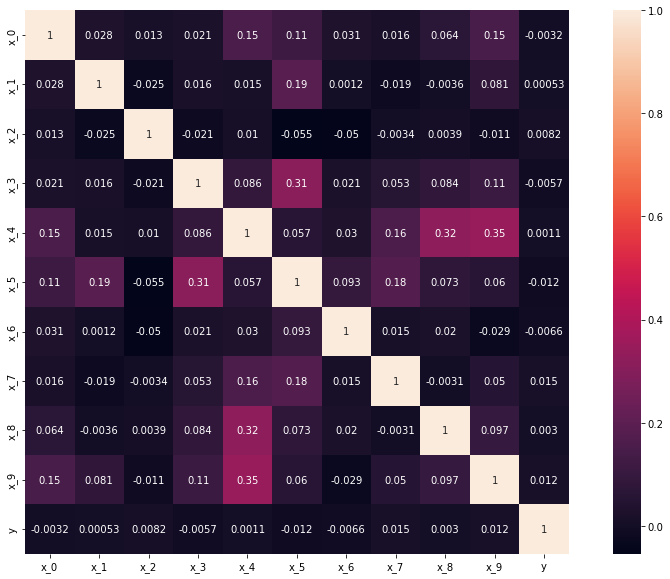

In [9]:
# check the correlation with all variables to check which variable is correlated high
# there was no significant consideration with y with x values
# so we proceed with next steps
ax=plt.subplots(figsize=(16,10))
sns.heatmap(df.corr(),vmax=1,square=True ,annot = True)

<AxesSubplot:xlabel='x_2', ylabel='y'>

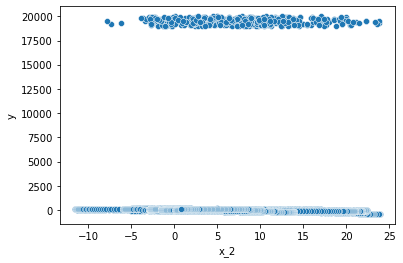

In [10]:
# Now visualize the data of y and x_0 values using scatter plot
sns.scatterplot(x='x_2',y='y', data=df)

(array([-2500.,     0.,  2500.,  5000.,  7500., 10000., 12500., 15000.,
        17500., 20000., 22500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

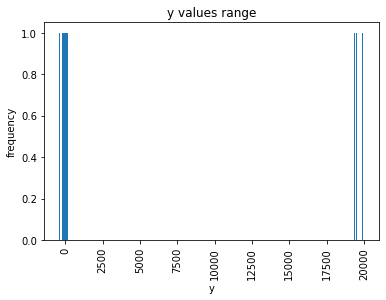

In [11]:
# counted the output where using bar plot 
df.y.value_counts()
plt.bar(df['y'].value_counts().index, df['y'].value_counts(), width= 0.5, bottom=None , align='center', data=df)
plt.title('y values range')
plt.xlabel('y')
plt.ylabel('frequency')
plt.xticks(rotation='vertical')

In [12]:
# It is checked all x values and y values are spreaded two areas of domain

df1 =df[df['y'] <=300]
df2 =df[df['y'] >=300]

print(df1.info())
print(df2.info())


<class 'pandas.core.frame.DataFrame'>
Float64Index: 9079 entries, 0.0 to 999.9000000000001
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x_0     9079 non-null   float64
 1   x_1     9079 non-null   float64
 2   x_2     9079 non-null   float64
 3   x_3     9079 non-null   float64
 4   x_4     9079 non-null   float64
 5   x_5     9079 non-null   float64
 6   x_6     9079 non-null   float64
 7   x_7     9079 non-null   float64
 8   x_8     9079 non-null   float64
 9   x_9     9079 non-null   float64
 10  y       9079 non-null   float64
dtypes: float64(11)
memory usage: 851.2 KB
None
<class 'pandas.core.frame.DataFrame'>
Float64Index: 475 entries, 0.2 to 999.5
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x_0     475 non-null    float64
 1   x_1     475 non-null    float64
 2   x_2     475 non-null    float64
 3   x_3     475 non-null    float64
 4   x_4     4

<AxesSubplot:xlabel='x_0', ylabel='y'>

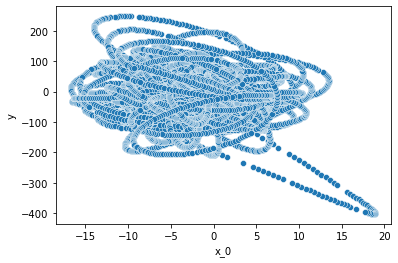

In [13]:
# Above, we split the data with 300 value or greater or less than
# we can also use 400 or 500 any other it is shown above 300
# y has 475 count above 300 and remaining values near origin.
# so split the data with condition and check the scatter plot

# first plot show the scatterplot relation and compared all the x values with
# y values

sns.scatterplot(x='x_0',y='y', data=df1)

<AxesSubplot:xlabel='x_1', ylabel='y'>

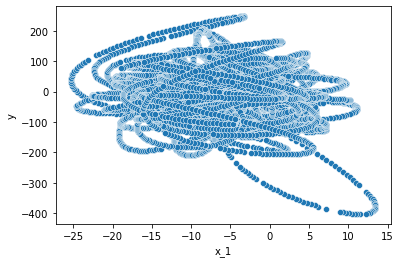

In [14]:
sns.scatterplot(x='x_1',y='y', data=df1)

<AxesSubplot:xlabel='x_2', ylabel='y'>

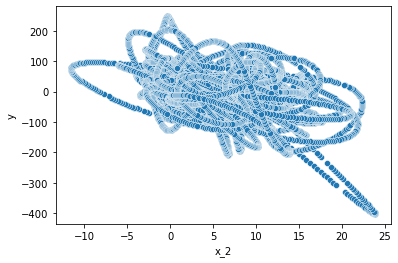

In [15]:
sns.scatterplot(x='x_2',y='y', data=df1)

<AxesSubplot:xlabel='x_3', ylabel='y'>

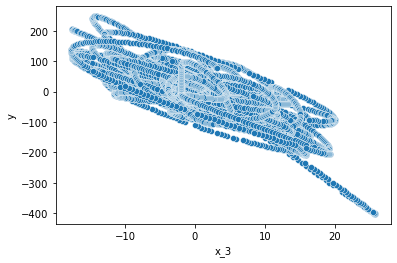

In [16]:
sns.scatterplot(x='x_3',y='y', data=df1)

<AxesSubplot:xlabel='x_4', ylabel='y'>

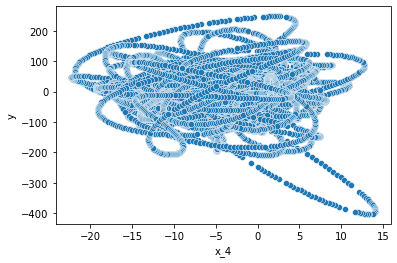

In [17]:
sns.scatterplot(x='x_4',y='y', data=df1)

<AxesSubplot:xlabel='x_5', ylabel='y'>

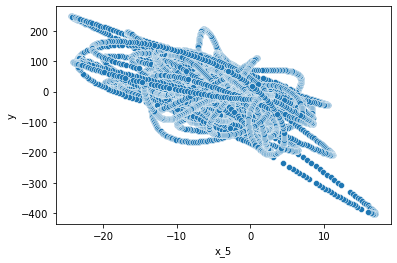

In [18]:
sns.scatterplot(x='x_5',y='y', data=df1)

<AxesSubplot:xlabel='x_6', ylabel='y'>

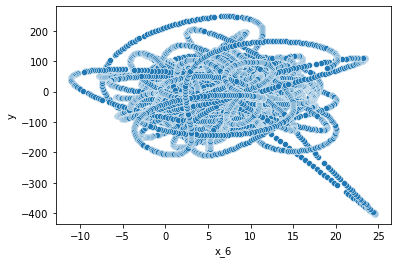

In [19]:
sns.scatterplot(x='x_6',y='y', data=df1)

<AxesSubplot:xlabel='x_7', ylabel='y'>

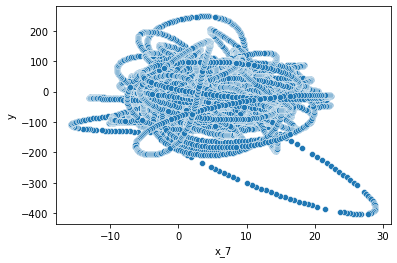

In [20]:
sns.scatterplot(x='x_7',y='y', data=df1)

<AxesSubplot:xlabel='x_8', ylabel='y'>

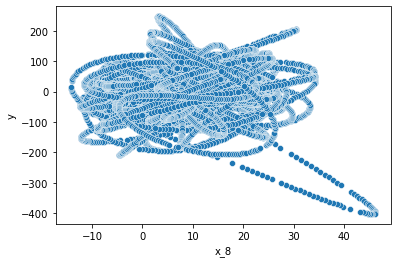

In [21]:
sns.scatterplot(x='x_8',y='y', data=df1)

<AxesSubplot:xlabel='x_9', ylabel='y'>

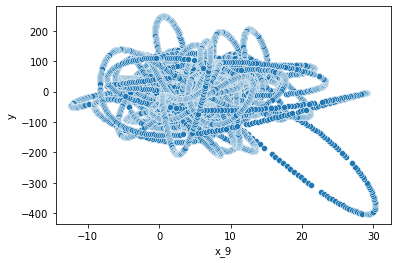

In [22]:
sns.scatterplot(x='x_9',y='y', data=df1)

<AxesSubplot:>

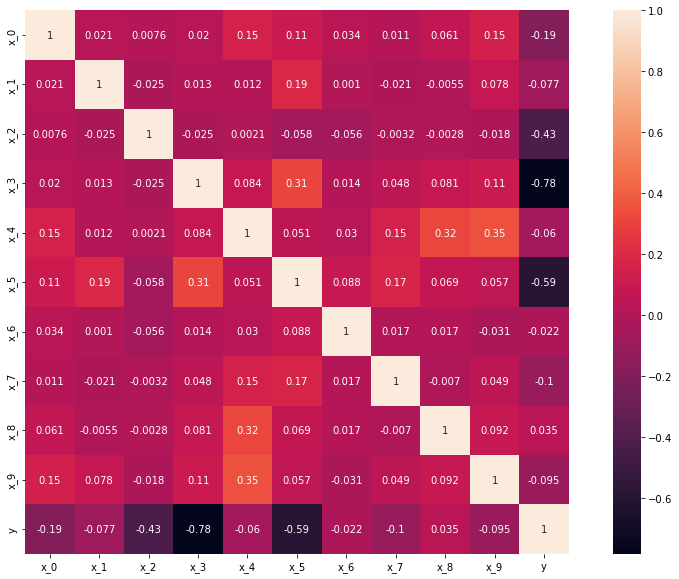

In [23]:
ax=plt.subplots(figsize=(16,10))
sns.heatmap(df1.corr(),vmax=1,square=True ,annot = True)

<AxesSubplot:xlabel='x_0', ylabel='y'>

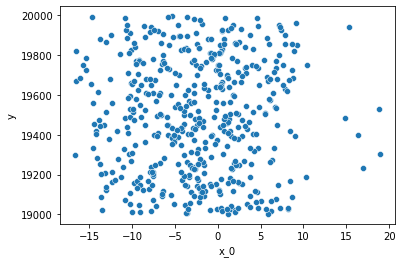

In [24]:
sns.scatterplot(x='x_0',y='y', data=df2)

<AxesSubplot:xlabel='x_1', ylabel='y'>

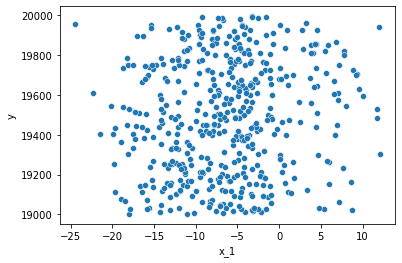

In [25]:
sns.scatterplot(x='x_1',y='y', data=df2)

<AxesSubplot:xlabel='x_2', ylabel='y'>

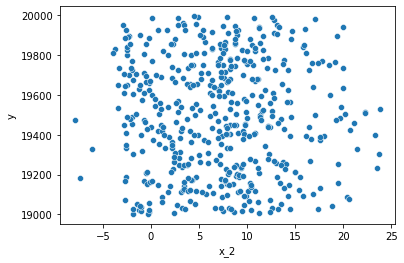

In [26]:
sns.scatterplot(x='x_2',y='y', data=df2)

<AxesSubplot:xlabel='x_3', ylabel='y'>

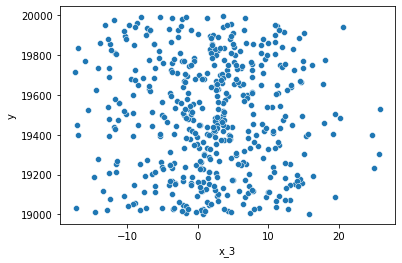

In [27]:
sns.scatterplot(x='x_3',y='y', data=df2)

<AxesSubplot:xlabel='x_4', ylabel='y'>

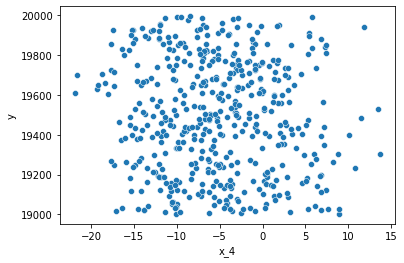

In [28]:
sns.scatterplot(x='x_4',y='y', data=df2)

<AxesSubplot:xlabel='x_5', ylabel='y'>

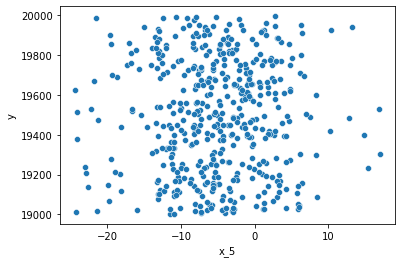

In [29]:
sns.scatterplot(x='x_5',y='y', data=df2)

<AxesSubplot:xlabel='x_6', ylabel='y'>

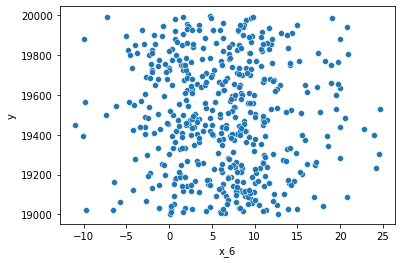

In [30]:
sns.scatterplot(x='x_6',y='y', data=df2)

<AxesSubplot:xlabel='x_7', ylabel='y'>

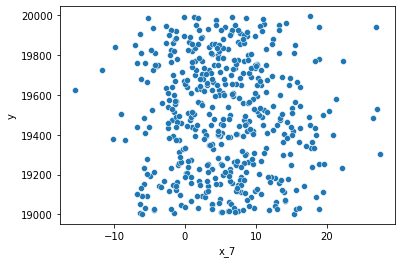

In [31]:
sns.scatterplot(x='x_7',y='y', data=df2)

<AxesSubplot:xlabel='x_8', ylabel='y'>

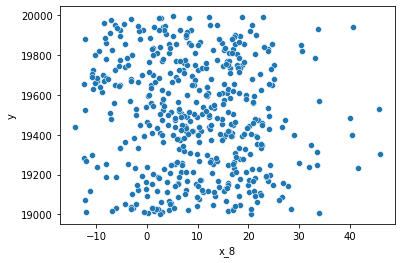

In [32]:
sns.scatterplot(x='x_8',y='y', data=df2)

<AxesSubplot:xlabel='x_9', ylabel='y'>

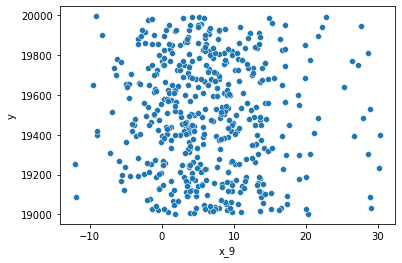

In [33]:
sns.scatterplot(x='x_9',y='y', data=df2)

<AxesSubplot:>

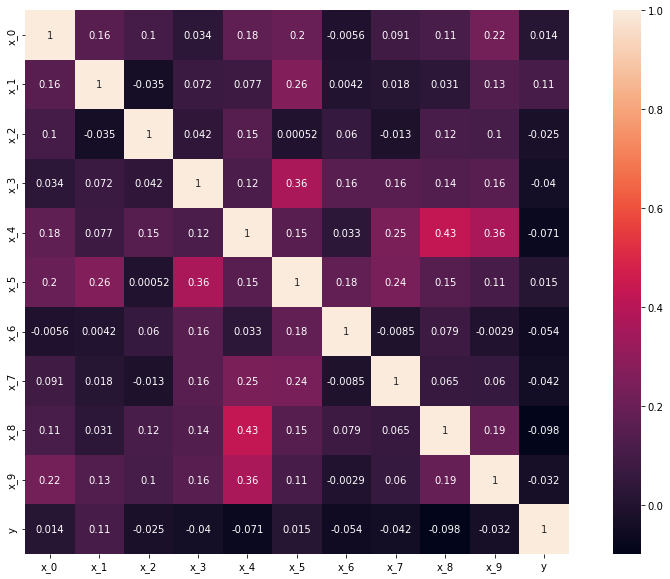

In [34]:
ax=plt.subplots(figsize=(16,10))
sns.heatmap(df2.corr(),vmax=1,square=True ,annot = True)

# Modeling part

# For df values before split the df1 and df2

In [49]:
# Case 0: 
# only df data is considered for this work
df_input = df.drop(['y'], axis=1)
df_output = df['y']

In [50]:
# modelling part used for linear regression model for continuous data sets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train,x_val,y_train,y_val=train_test_split(df_input,df_output,test_size=0.15,random_state=42)
lm =LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [51]:
predictions=lm.predict(x_val)

In [52]:
# intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

688.4190103353994
[ -0.03607352  -0.288515     7.71689321  -0.90944193  -6.26582695
 -12.88194265  -4.62611053  14.01341932   2.23476852  10.84122786]


In [53]:
#  calculated the values of mean squared error and mean squared error
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

print("R2 score : %.2f" % r2_score(y_val,predictions))
print("Mean absolute error : %.2f" % mean_absolute_error(y_val,predictions))

print("Mean squared error : %.2f" % mean_squared_error(y_val,predictions))

print("Root Mean absolute error : %.2f" %np.sqrt(mean_absolute_error(y_val,predictions)))

R2 score : -0.00
Mean absolute error : 1813.22
Mean squared error : 17271394.27
Root Mean absolute error : 42.58


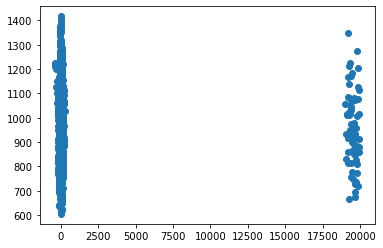

In [54]:
plt.scatter(y_val,predictions)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


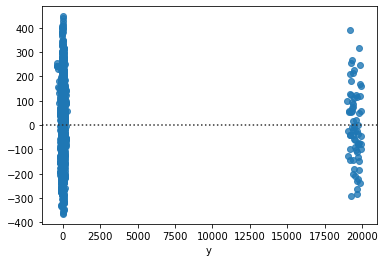

In [55]:
import seaborn as sns
sns.residplot(y_val, predictions)  
plt.show()

# For x_2, x_3, and x_5 variables

In [56]:
# Case 1: It runs the model with three variables X_2, X_3, and X_5 from df1 data set
# These three variables causes high correlated variables are shown in above scatter plot
# considered dependency values to predict the model 
# df2 is not observed any non-linear relationship, if we use data it might cause to wrong prediction
# only df1 data is considered for this work
df_input = df1[['x_2','x_3','x_5']]
df_output = df1['y']

In [57]:
# modelling part used for linear regression model for continuous data sets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train,x_val,y_train,y_val=train_test_split(df_input,df_output,test_size=0.15,random_state=42)
lm =LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [58]:
predictions=lm.predict(x_val)

In [59]:
# intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

16.895200324214137
[-6.53008888 -6.7734334  -5.10024329]


In [60]:
#  calculated the values of mean squared error and mean squared error
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

print("R2 score : %.2f" % r2_score(y_val,predictions))
print("Mean absolute error : %.2f" % mean_absolute_error(y_val,predictions))

print("Mean squared error : %.2f" % mean_squared_error(y_val,predictions))

print("Root Mean absolute error : %.2f" %np.sqrt(mean_absolute_error(y_val,predictions)))

R2 score : 0.97
Mean absolute error : 11.59
Mean squared error : 205.62
Root Mean absolute error : 3.40


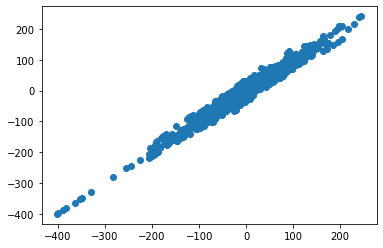

In [61]:
plt.scatter(y_val,predictions)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


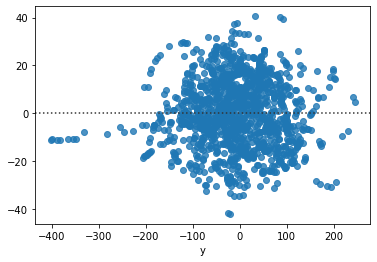

In [62]:
import seaborn as sns
sns.residplot(y_val, predictions)  
plt.show()

# For all variables

In [63]:
# considered dependency values to predict the model 
# df2 is not observed any non-linear relationship, if we use data it might cause to wrong prediction
# only df1 data is considered for this work
df_input_all = df1[['x_0','x_1','x_2','x_3','x_4','x_5','x_6','x_7','x_8','x_9']]
df_output_all = df1['y']

In [64]:
# modelling part used for linear regression model for continuous data sets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train_all,x_val_all,y_train_all,y_val_all=train_test_split(df_input_all,df_output_all,test_size=0.15,random_state=42)
lm_all =LinearRegression()
lm_all.fit(x_train_all,y_train_all)

LinearRegression()

In [65]:
predictions_all=lm_all.predict(x_val_all)

In [66]:
# score predicted 
lm_all.score(x_val_all,y_val_all)

0.9999999936074148

In [67]:
# intercept and coefficients
print(lm_all.intercept_)

print(lm_all.coef_)

3.919598877227161
[-1.82099643e+00 -5.38397681e-06 -6.53421423e+00 -6.87138403e+00
 -8.25135280e-06 -4.99523722e+00  4.87780189e-06 -2.41707276e-05
  9.84547161e-01  5.68255315e-06]


In [68]:
#  calculated the values of mean squared error and mean squared error
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

print("R2 score : %.2f" % r2_score(y_val_all,predictions_all))
print("Mean absolute error : %.2f" % mean_absolute_error(y_val_all,predictions_all))

print("Mean squared error : %.2f" % mean_squared_error(y_val_all,predictions_all))

print("Root Mean absolute error : %.2f" %np.sqrt(mean_absolute_error(y_val_all,predictions_all)))

R2 score : 1.00
Mean absolute error : 0.00
Mean squared error : 0.00
Root Mean absolute error : 0.06


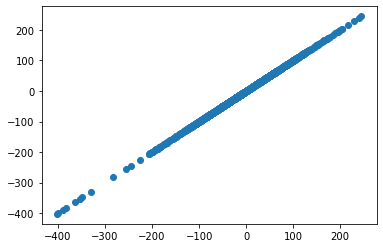

In [69]:
plt.scatter(y_val_all,predictions_all)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


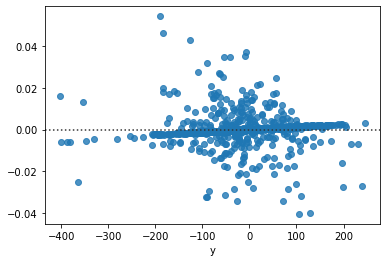

In [70]:
import seaborn as sns
sns.residplot(y_val_all, predictions_all)  
plt.show()

# Support vector machines for three variables

In [71]:
# Fitting the Support Vector Regression Model to the dataset
# Create your support vector regressor here
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(x_train,y_train)

SVR()

In [72]:
y_pred = regressor.predict(x_val)
# score predicted 
regressor.score(x_val,y_val)

0.8795123464693808

In [73]:
print("R2 score : %.2f" % r2_score(y_val,y_pred))
print("Mean absolute error : %.2f" % mean_absolute_error(y_val,y_pred))

print("Mean squared error : %.2f" % mean_squared_error(y_val,y_pred))

print("Root Mean absolute error : %.2f" %np.sqrt(mean_absolute_error(y_val,y_pred)))

R2 score : 0.88
Mean absolute error : 14.83
Mean squared error : 804.85
Root Mean absolute error : 3.85


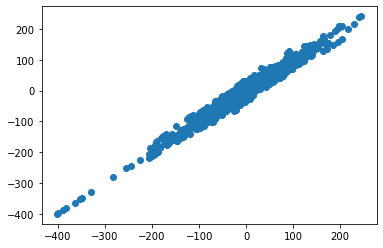

In [74]:
plt.scatter(y_val,predictions)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


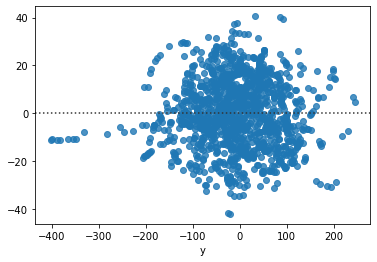

In [75]:
import seaborn as sns
sns.residplot(y_val, predictions)  
plt.show()

# SVM for all variables

In [76]:
# Fitting the Support Vector Regression Model to the dataset
# Create your support vector regressor here
from sklearn.svm import SVR
regressor_all = SVR(kernel='rbf')
regressor_all.fit(x_train_all,y_train_all)

SVR()

In [77]:
y_pred_all = regressor_all.predict(x_val_all)
# score predicted 
regressor_all.score(x_val_all,y_val_all)

0.8688412134282295

In [78]:
print("R2 score : %.2f" % r2_score(y_val_all,y_pred_all))
print("Mean absolute error : %.2f" % mean_absolute_error(y_val_all,y_pred_all))

print("Mean squared error : %.2f" % mean_squared_error(y_val_all,y_pred_all))

print("Root Mean absolute error : %.2f" %np.sqrt(mean_absolute_error(y_val_all,y_pred_all)))

R2 score : 0.87
Mean absolute error : 10.22
Mean squared error : 876.13
Root Mean absolute error : 3.20


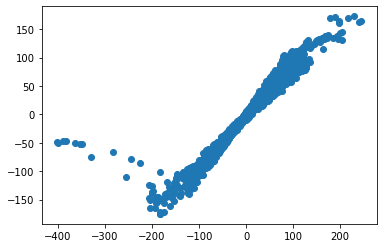

In [79]:
plt.scatter(y_val_all,y_pred_all)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


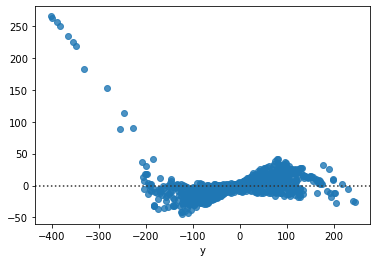

In [80]:
import seaborn as sns
sns.residplot(y_val_all, y_pred_all)  
plt.show()

In [ ]:
#Conclusion-- Note
# Linear regression method with all variables predicted well then consider three variables (x2,x3,and x5) in df1 data set. 
# compared to SVM mean absolute error is higher than linear regression. 
# For more better results we can use more regression algorithms, only two algorithms are modelled here. 
# Target variables are double value then input variable with all parameters it is formed linear equation
# From this work, elimination of column affects the prediction error and score of the developed model in mechanical systems.
# IT models, most of the time, more columns of data the prediction analysis if the data is complex to understand.

# Thank you for this opportunity.